## Linear Regression with Boston House Prices dataset

In [6]:
import matplotlib.pyplot as plt
% matplotlib inline
import numpy as np


### Load dataset and exploration

In [7]:
from sklearn.datasets import load_boston
boston = load_boston()
X, y = boston.data, boston.target

In [12]:
#boston.DESCR

### Show the dataset descriptition

In [18]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

### Plot the house price (MEDV) wtih regard to different features

In [19]:
import matplotlib.pyplot as plt
% matplotlib inline
import numpy as np

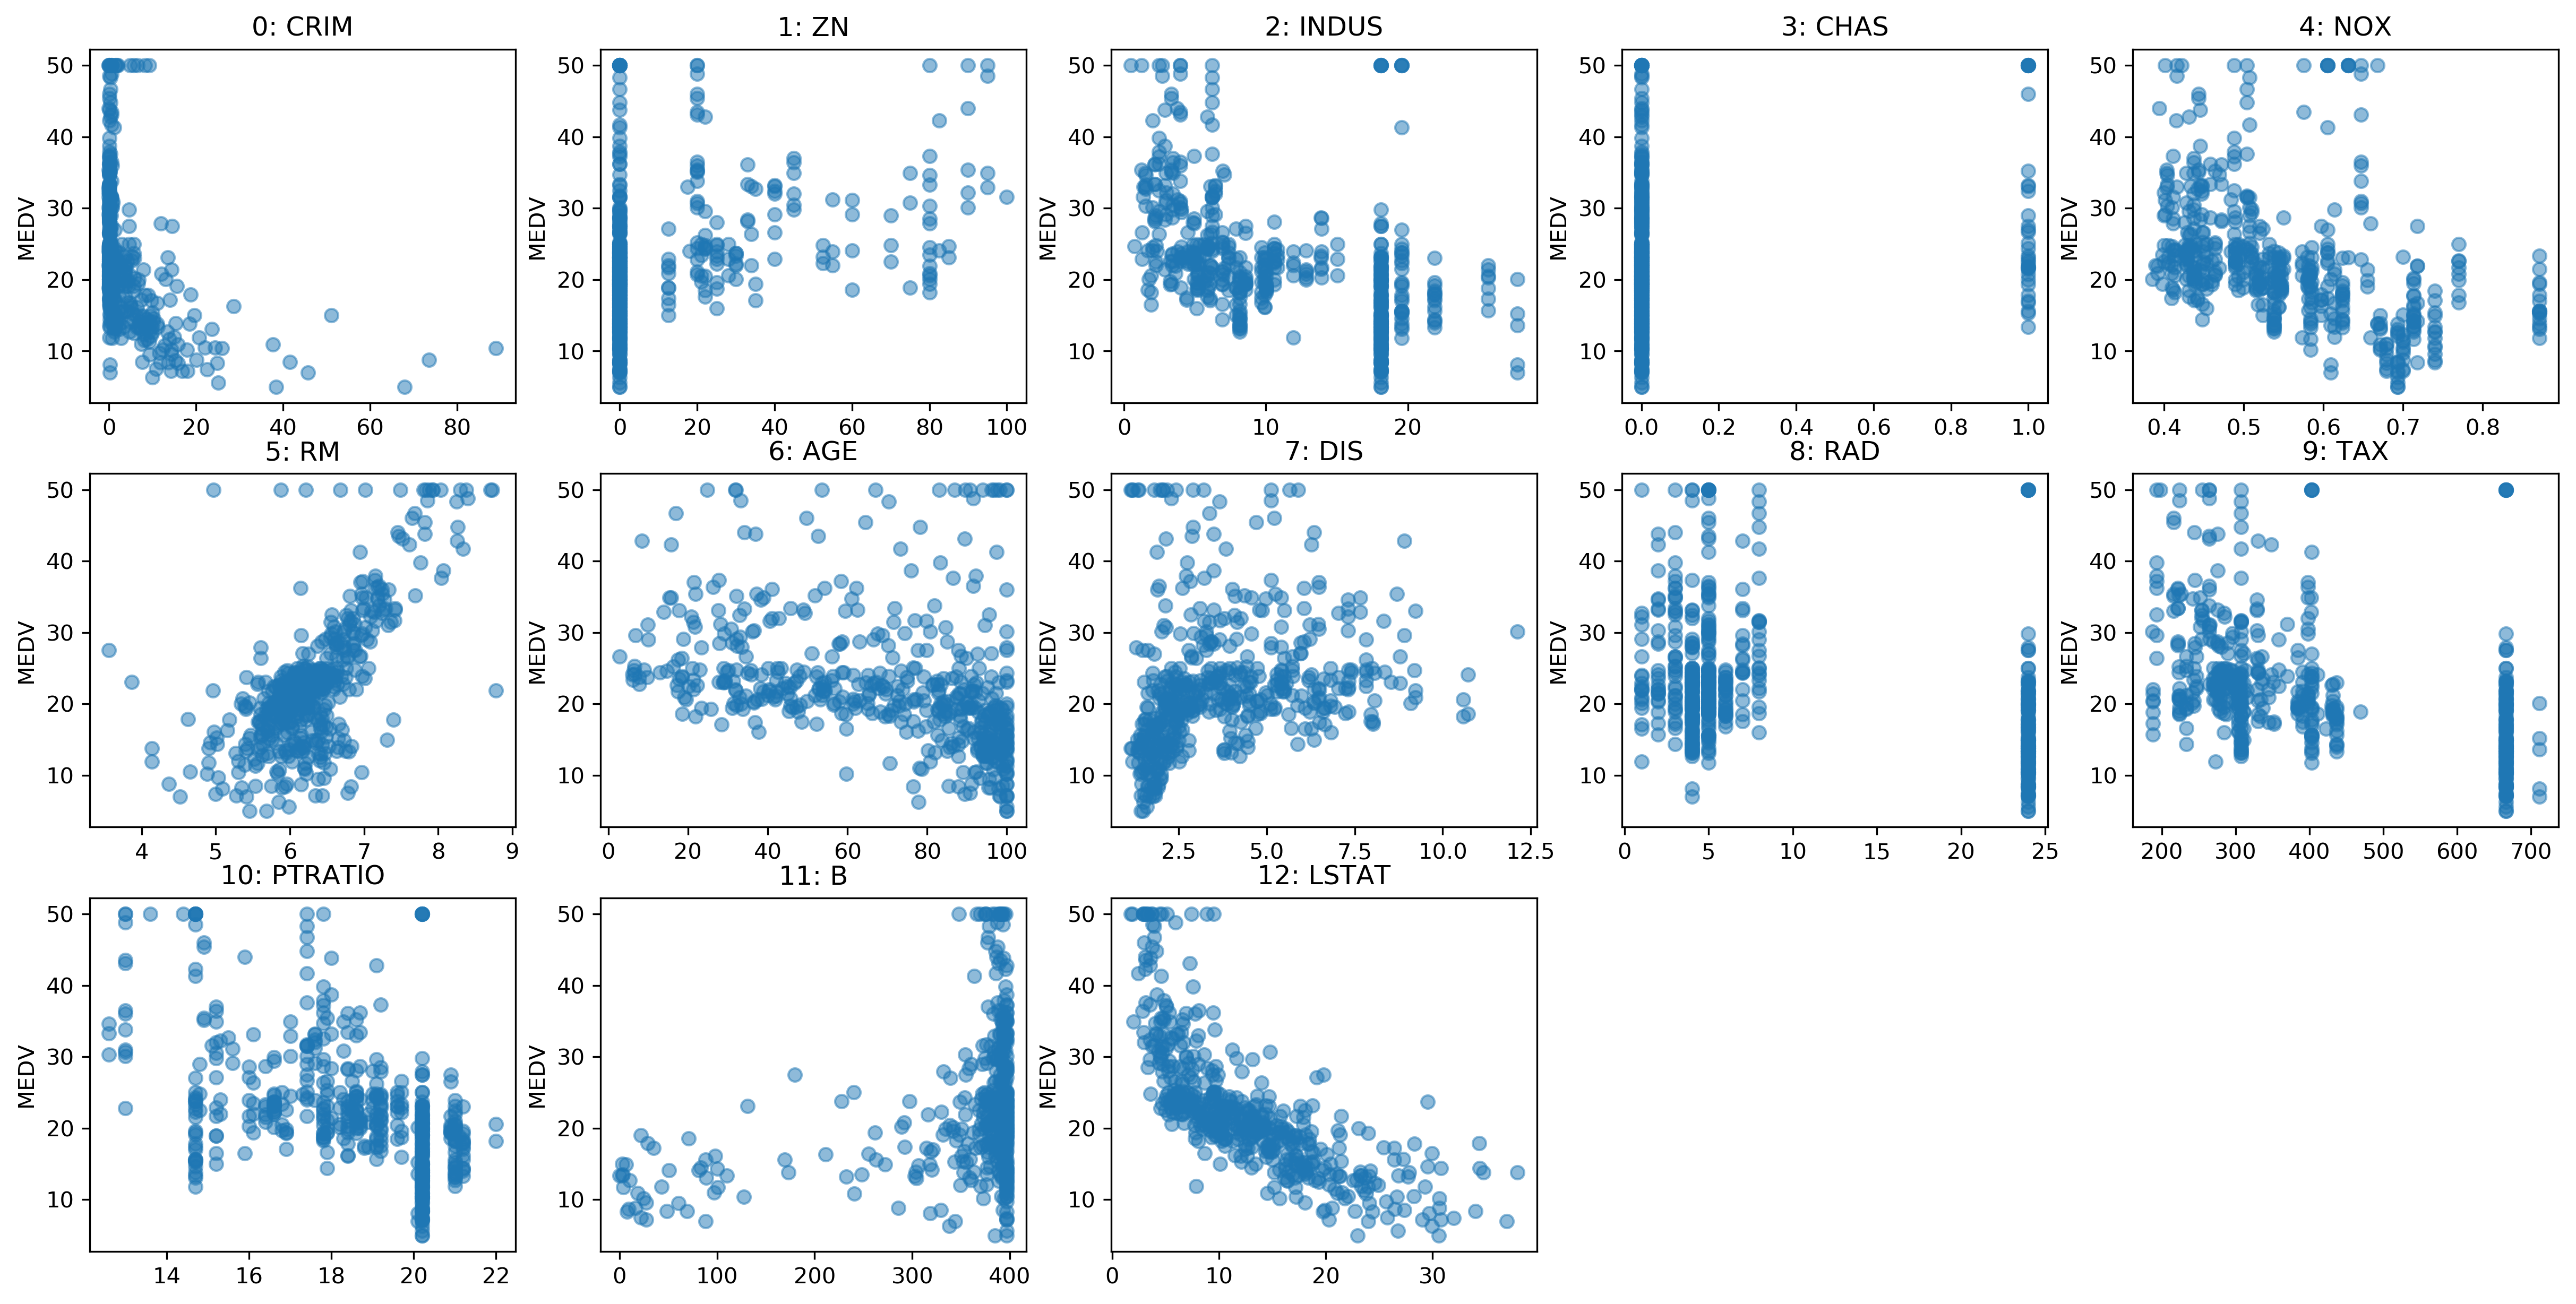

In [20]:
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.bbox'] = 'tight'
fig, axes = plt.subplots(3, 5, figsize=(20, 10))
for i, ax in enumerate(axes.ravel()):
    if i > 12:
        ax.set_visible(False)
        continue
    ax.plot(X[:, i], y, 'o', alpha=.5)
    ax.set_title("{}: {}".format(i, boston.feature_names[i]))
    ax.set_ylabel("MEDV")

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [22]:
print(X.shape)
print(y.shape)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(506, 13)
(506,)
(379, 13)
(379,)
(127, 13)
(127,)


## Linear Regression: The syntax
#### Import the class containing the regression method

In [23]:
from sklearn.linear_model import LinearRegression

#### Create an instance of the class

In [24]:
linreg=LinearRegression()

#### Fit the instance on the data 

In [25]:
linreg.fit(X_train, y_train)
# To disable the output use
# linreg=linreg.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

#### Show the model parameters (coefficients and intercept)

In [33]:
print("linreg.coef_: {}".format(linreg.coef_)) # ค่า w1 w2 w3
print("linreg.intercept_: {}".format(linreg.intercept_))

linreg.coef_: [ -1.27824912e-01   2.95208977e-02   4.92643105e-02   2.77594439e+00
  -1.62801962e+01   4.36089596e+00  -9.19111559e-03  -1.40172019e+00
   2.57458956e-01  -9.94705777e-03  -9.24266403e-01   1.33164215e-02
  -5.18565634e-01]
linreg.intercept_: 29.883345627157176


#### Then predict the expected value

In [27]:
y_predict = linreg.predict(X_test)

In [28]:
print(y_predict)

[ 28.84435256  36.01528645  15.09049798  25.23939437  18.87034833
  23.21842749  17.59151854  14.29798014  23.05832558  20.62071271
  24.79141889  18.66756318  -7.00821616  21.83986892  19.21327964
  26.27933286  20.5475019    5.65228818  40.41962746  17.63739357
  27.32663541  30.05426616  11.13958579  24.1141802   17.87975122
  15.79393109  22.95810173  14.19824493  22.27171161  19.24893029
  22.27637518  25.24589065  25.6906829   17.99006013  16.69109685
  17.10092877  31.19877823  20.17867405  23.72051289  24.79532938
  13.94447612  32.00271322  42.53357742  17.45043617  27.15727227
  17.07463384  13.88645803  26.06800047  20.36819247  29.98424831
  21.35765004  34.32583526  15.87960152  26.17795749  39.5103807
  22.8404951   18.9447771   32.69008797  25.02268835  12.90262737
  22.75348627  30.5313448   31.61070012  15.91080308  20.50212053
  16.51289219  20.49698328  26.0110717   30.64001397  11.37170957
  20.54083102  27.56652062  10.82523639  15.96338287  23.88288041
   5.669848

#### R^2 Score of the trained model

In [29]:
print("Training set score: {:.2f}".format(linreg.score(X_train, y_train)))
print("Test set score: {:.2f}".format(linreg.score(X_test, y_test)))

Training set score: 0.75
Test set score: 0.68


In [30]:
from sklearn.metrics import mean_squared_error, r2_score

In [31]:
# The mean squared error
mse_test=mean_squared_error(y_test, y_predict)
print("Mean squared error: %.2f" % mse_test)

# R2-score: Explained variance score: 1 is perfect prediction
r2_test= r2_score(y_test, y_predict)
print('Variance score: %.2f' % r2_test)

Mean squared error: 22.13
Variance score: 0.68


### Perform Cross-Validation Evaluation

In [34]:
from sklearn.model_selection import cross_val_score
cv_score=cross_val_score(LinearRegression(), X_train, y_train, cv=10)
mean_cv_score=np.mean(cv_score)

In [35]:
print(cv_score)
print(mean_cv_score)

[ 0.78340546  0.7030789   0.55595865  0.73274433  0.82863772  0.69987528
  0.8050347   0.7180536   0.78909825  0.5446926 ]
0.716057949201


## Ridge Regression: The syntax
#### Import the class containing the regression method
#### Create an instance of the class
#### Fit the instance on the data and then predict the expected value

In [36]:
from sklearn.linear_model import Ridge
RR = Ridge(alpha=1.0)
RR = RR.fit(X_train, y_train)
y_predict = RR.predict(X_test)

In [37]:
print("Training set score: {:.2f}".format(RR.score(X_train, y_train)))
print("Test set score: {:.2f}".format(RR.score(X_test, y_test)))
# The mean squared error
mse_test=mean_squared_error(y_test, y_predict)
print("Mean squared error: %.2f" % mse_test)

# R2-score: Explained variance score: 1 is perfect prediction
r2_test= r2_score(y_test, y_predict)
print('Variance score: %.2f' % r2_test)

Training set score: 0.75
Test set score: 0.68
Mean squared error: 22.51
Variance score: 0.68


In [39]:
cv_score=cross_val_score(Ridge(alpha=1.0), X_train, y_train, cv=10)
mean_cv_score=np.mean(cv_score)
print(cv_score)
print(mean_cv_score)

[ 0.77452955  0.69717248  0.55353278  0.75772415  0.82558061  0.69257219
  0.80756868  0.71306441  0.78200947  0.53710091]
0.714085522598


## Grid-Search with Cross-Validation

In [41]:
from sklearn.model_selection import GridSearchCV
param_grid = {'alpha': np.logspace(-3, 3, 13)} # ตั้งแต่ 10^-3 - 10^3 10ตัว
np.set_printoptions(suppress=True, precision=3)
print(param_grid)

{'alpha': array([    0.001,     0.003,     0.01 ,     0.032,     0.1  ,     0.316,
           1.   ,     3.162,    10.   ,    31.623,   100.   ,   316.228,
        1000.   ])}


In [43]:
grid = GridSearchCV(Ridge(), param_grid, cv=10, return_train_score=True, iid=False)
grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=False, n_jobs=1,
       param_grid={'alpha': array([    0.001  ,     0.00316,     0.01   ,     0.03162,     0.1    ,
           0.31623,     1.     ,     3.16228,    10.     ,    31.62278,
         100.     ,   316.22777,  1000.     ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

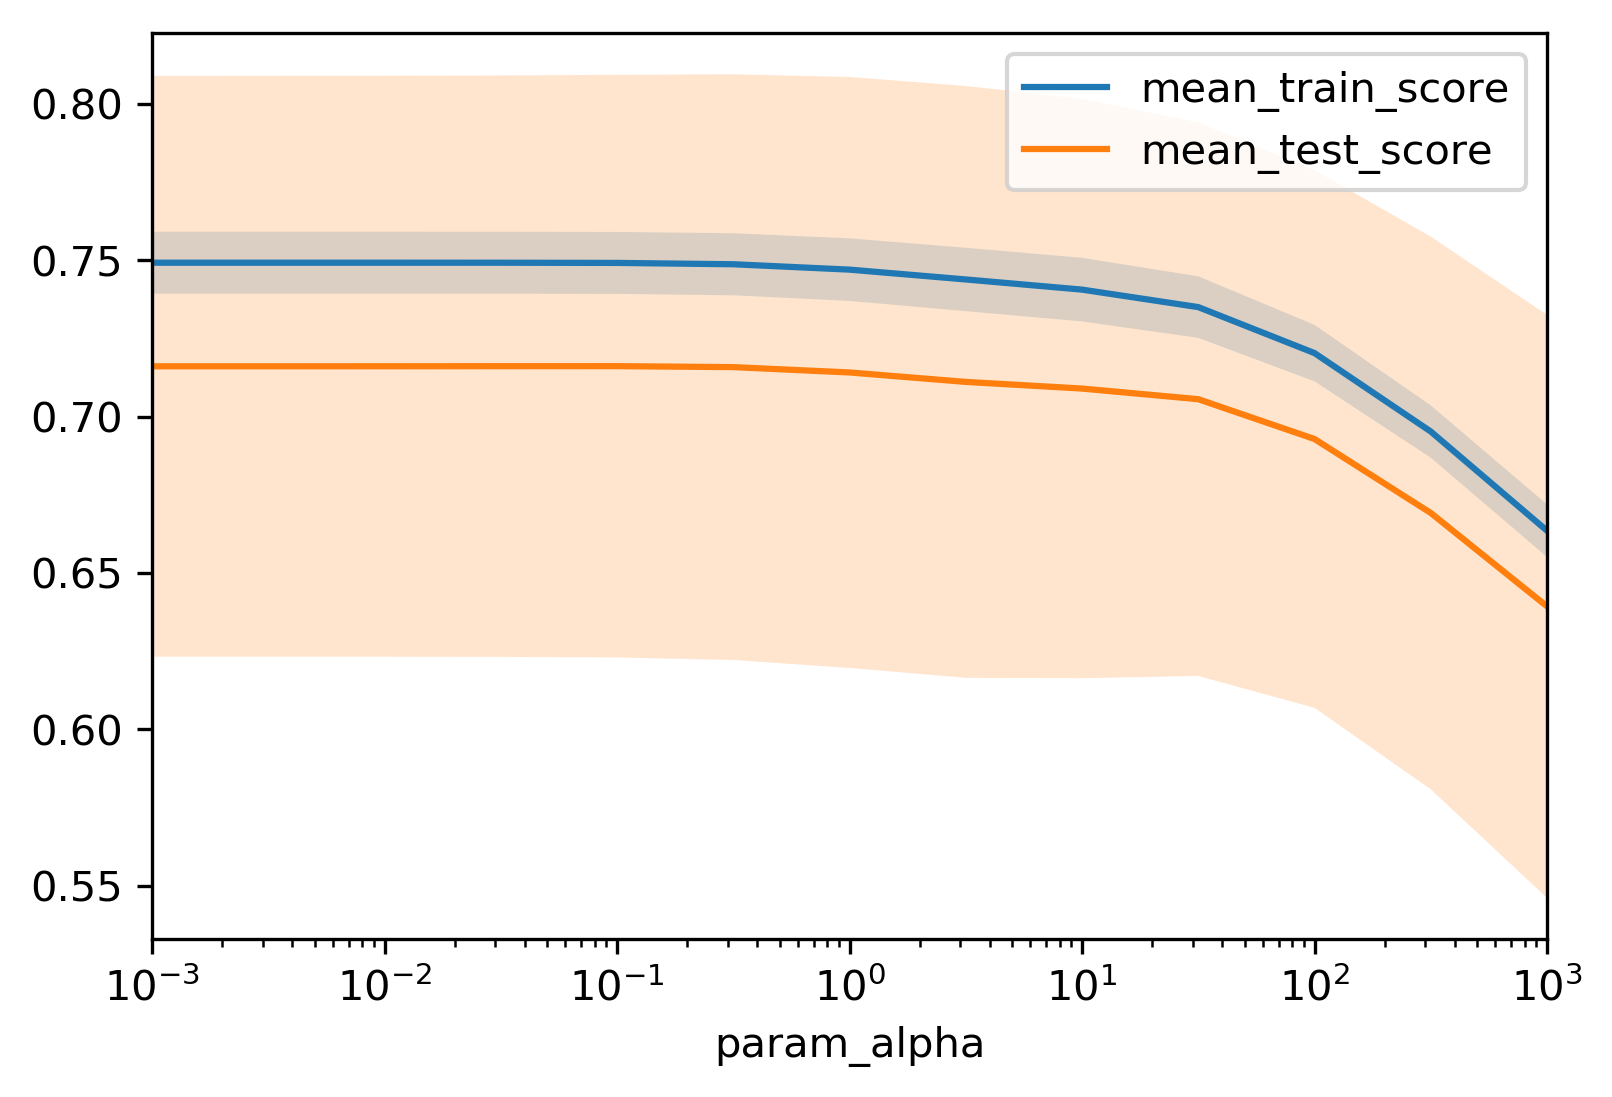

In [44]:
import pandas as pd
results = pd.DataFrame(grid.cv_results_)
results.plot('param_alpha', 'mean_train_score')
results.plot('param_alpha', 'mean_test_score', ax=plt.gca())
plt.fill_between(results.param_alpha.astype(np.float),
                 results['mean_train_score'] + results['std_train_score'],
                 results['mean_train_score'] - results['std_train_score'], alpha=0.2)
plt.fill_between(results.param_alpha.astype(np.float),
                 results['mean_test_score'] + results['std_test_score'],
                 results['mean_test_score'] - results['std_test_score'], alpha=0.2)
plt.legend()
plt.xscale("log")
plt.savefig("ridge_alpha_search.png")

In [45]:
print(grid.best_params_)
print(grid.best_score_)

{'alpha': 0.10000000000000001}
0.716105246056


In [46]:
grid.score(X_test, y_test)

0.68333884019165891

## Lasso Regression: The syntax
#### Import the class containing the regression method
#### Create an instance of the class
#### Fit the instance on the data and then predict the expected value

In [47]:
from sklearn.linear_model import Lasso
LR = Lasso(alpha=1.0)
LR = LR.fit(X_train, y_train)
y_predict = LR.predict(X_test)

In [48]:
print("Training set score: {:.2f}".format(LR.score(X_train, y_train)))
print("Test set score: {:.2f}".format(LR.score(X_test, y_test)))
# The mean squared error
mse_test=mean_squared_error(y_test, y_predict)
print("Mean squared error: %.2f" % mse_test)

# R2-score: Explained variance score: 1 is perfect prediction
r2_test= r2_score(y_test, y_predict)
print('Variance score: %.2f' % r2_test)

Training set score: 0.69
Test set score: 0.65
Mean squared error: 24.43
Variance score: 0.65


## Grid-Search with Cross-Validation

In [49]:
grid = GridSearchCV(Lasso(), param_grid, cv=10, return_train_score=True, iid=False)
grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=False, n_jobs=1,
       param_grid={'alpha': array([    0.001  ,     0.00316,     0.01   ,     0.03162,     0.1    ,
           0.31623,     1.     ,     3.16228,    10.     ,    31.62278,
         100.     ,   316.22777,  1000.     ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

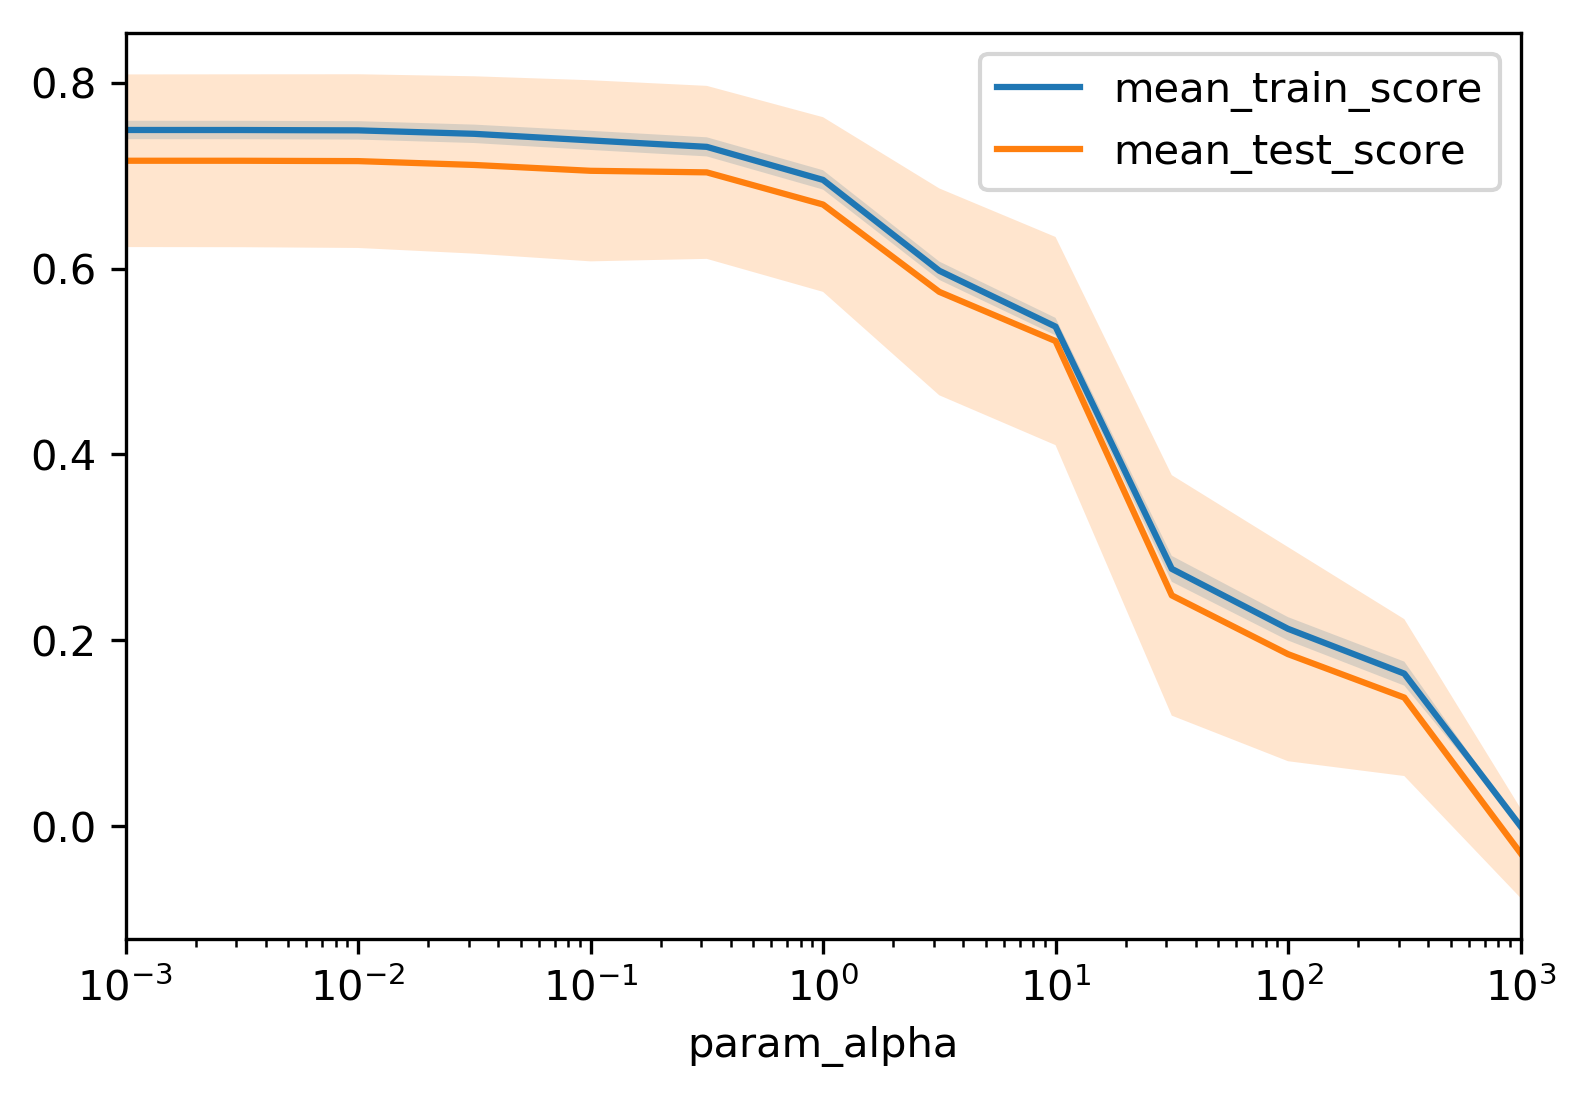

In [50]:
import pandas as pd
results = pd.DataFrame(grid.cv_results_)
results.plot('param_alpha', 'mean_train_score')
results.plot('param_alpha', 'mean_test_score', ax=plt.gca())
plt.fill_between(results.param_alpha.astype(np.float),
                 results['mean_train_score'] + results['std_train_score'],
                 results['mean_train_score'] - results['std_train_score'], alpha=0.2)
plt.fill_between(results.param_alpha.astype(np.float),
                 results['mean_test_score'] + results['std_test_score'],
                 results['mean_test_score'] - results['std_test_score'], alpha=0.2)
plt.legend()
plt.xscale("log")
plt.savefig("lasso_alpha_search.png")

In [51]:
print(grid.best_params_)
print(grid.best_score_)

{'alpha': 0.001}
0.716065623613


In [52]:
grid.score(X_test, y_test)

0.68384672761207743